<a href="https://colab.research.google.com/github/nisha432/anomaly-/blob/main/Copy_of_anomlay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import matplotlib.patheffects as path_effects
import pandas as pd
from sklearn.impute import SimpleImputer
from matplotlib.patheffects import PathPatchEffect, SimpleLineShadow, Normal
# Machine Learning and Data Preprocessing Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve, auc,
    mean_squared_error, mean_absolute_error, r2_score, classification_report
)

import lightgbm
from xgboost import XGBClassifier, XGBRFClassifier

# Visualization settings
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


In [ ]:
sales = pd.read_csv("/content/sales data-set.csv")

In [ ]:
features = pd.read_csv("/content/Features data set.csv")

In [ ]:
stores = pd.read_csv("/content/stores data-set.csv")

In [ ]:
sales.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
sales['Store'] = sales['Store'].astype('int32')
sales['Dept'] = sales['Dept'].astype('int32')
sales['Weekly_Sales'] = sales['Weekly_Sales'].astype('float32')

In [ ]:
sales['IsHoliday'] = sales['IsHoliday'].astype(int)


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int32  
 1   Dept          421570 non-null  int32  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float32
 4   IsHoliday     421570 non-null  int64  
dtypes: float32(1), int32(2), int64(1), object(1)
memory usage: 11.3+ MB


In [ ]:
duplicates = sales.duplicated()

# Display the duplicate rows
duplicate_rows = sales[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Store, Dept, Date, Weekly_Sales, IsHoliday]
Index: []


In [ ]:
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
sales.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

#### Anomaly Detection in Sales Data:

In [ ]:
mean_sales = np.mean(sales['Weekly_Sales'])
std_deviation = np.std(sales['Weekly_Sales'])

# Set a threshold for flagging anomalies (e.g., 2 standard deviations from the mean)
threshold = mean_sales + 2 * std_deviation

# Identify anomalies
anomalies = [data_point for data_point in sales['Weekly_Sales'] if data_point > threshold]

print("Retail Sales Data:")
print("Sales Data:", sales['Weekly_Sales'][0:10])
print("Mean Sales:", mean_sales)
print("Standard Deviation:", std_deviation)
print("Anomalies (2 standard deviations from the mean):", anomalies)

Retail Sales Data:
Sales Data: 0    24924.500000
1    46039.488281
2    41595.550781
3    19403.539062
4    21827.900391
5    21043.390625
6    22136.640625
7    26229.210938
8    57258.429688
9    42960.910156
Name: Weekly_Sales, dtype: float32
Mean Sales: 15981.255
Standard Deviation: 22707.666015625
Anomalies (2 standard deviations from the mean): [65615.359375, 70158.859375, 85676.09375, 79340.1484375, 61483.8203125, 72635.0625, 63896.890625, 96198.1171875, 166697.71875, 71151.34375, 69511.0625, 119302.1484375, 62381.0, 115564.3515625, 94136.3515625, 98672.59375, 92755.59375, 108282.859375, 98175.3515625, 71165.71875, 95855.40625, 101566.8671875, 98689.4609375, 77602.0, 87205.8828125, 127811.890625, 107634.2109375, 91179.5078125, 80273.34375, 87937.0, 96137.671875, 105539.53125, 86860.9375, 79026.1484375, 100958.25, 87346.140625, 80431.546875, 66892.4375, 76542.8125, 93809.75, 78915.6015625, 70299.2109375, 77852.7421875, 90990.9296875, 78481.3203125, 76162.3828125, 87720.9765625, 1

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
# Create a numpy array from the data
sales_array = np.array(sales['Weekly_Sales']).reshape(-1, 1)

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1)  # Adjust the contamination parameter as needed

# Fit the model
iso_forest.fit(sales_array)

# Predict anomalies
anomaly_predictions = iso_forest.predict(sales_array)

# Get the indices of anomalies
anomaly_indices = np.where(anomaly_predictions == -1)

# Identify anomalies
anomalies = [sales['Weekly_Sales'][i] for i in anomaly_indices[0]]
print("Anomalies:", anomalies)


Anomalies: [57258.43, 44912.86, 55931.23, 46845.87, 50510.31, 41512.39, 39886.06, 46788.75, 54060.1, 57592.12, 50605.27, 44682.74, 47928.89, 44292.87, 48397.98, 47450.5, 46549.73, 45025.02, 44418.11, 47903.01, 44319.15, 44619.52, 48754.47, 47089.54, 44428.71, 47077.72, 46752.12, 44339.2, 44763.33, 50031.73, 49754.17, 49623.53, 49015.05, 44681.64, 46387.54, 44081.33, 46381.43, 41443.25, 44405.02, 46955.82, 49303.28, 59889.32, 39857.4, 46829.12, 47595.35, 49202.06, 46165.25, 53035.54, 48465.72, 44293.54, 46991.58, 48501.79, 44464.74, 46544.56, 50139.92, 44274.15, 44302.11, 45072.11, 47844.27, 46363.93, 44623.23, 49359.75, 46391.12, 47659.93, 49419.75, 49880.69, 47313.62, 44936.47, 43997.78, 44259.59, 49357.43, 51137.42, 65615.36, 44481.38, 54322.24, 50581.06, 47080.12, 52608.51, 48563.69, 47346.32, 44796.03, 46529.68, 51805.88, 43991.18, 50501.3, 44411.23, 47425.29, 49439.58, 46637.48, 47629.14, 49771.92, 44411.95, 45008.22, 49424.06, 46350.97, 44972.52, 50995.5, 47344.5, 44493.61, 48577

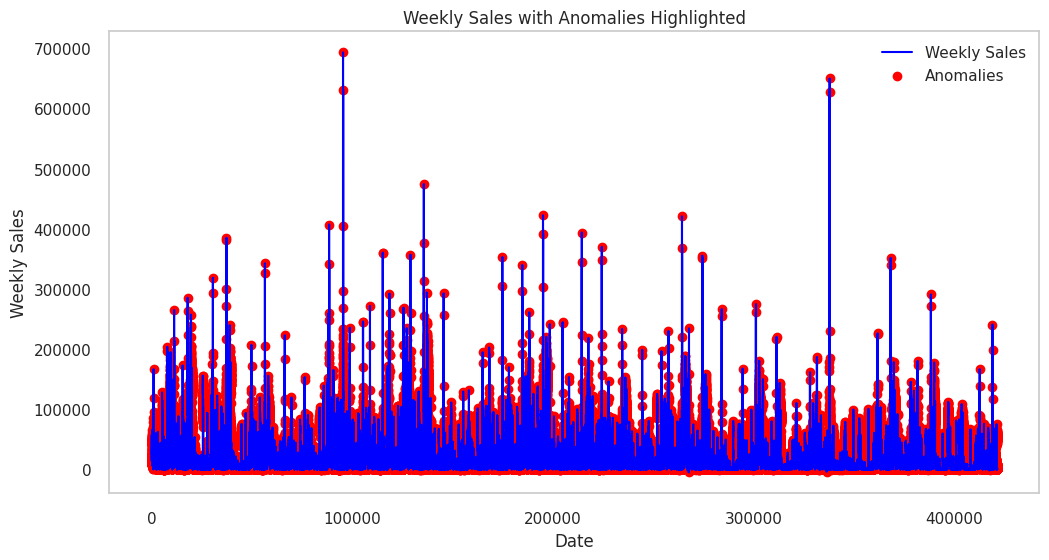

In [ ]:
# Visualizing anomalies
plt.figure(figsize=(12, 6))
plt.plot(sales['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.scatter(sales.index, sales['Weekly_Sales'], color='red', label='Anomalies')
plt.title('Weekly Sales with Anomalies Highlighted')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()

In [ ]:
sales

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  05/02/2010  24924.500000          0
1           1     1  12/02/2010  46039.488281          1
2           1     1  19/02/2010  41595.550781          0
3           1     1  26/02/2010  19403.539062          0
4           1     1  05/03/2010  21827.900391          0
...       ...   ...         ...           ...        ...
421565     45    98  28/09/2012    508.369995          0
421566     45    98  05/10/2012    628.099976          0
421567     45    98  12/10/2012   1061.020020          0
421568     45    98  19/10/2012    760.010010          0
421569     45    98  26/10/2012   1076.800049          0

[421570 rows x 5 columns]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import STL

In [ ]:
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True)

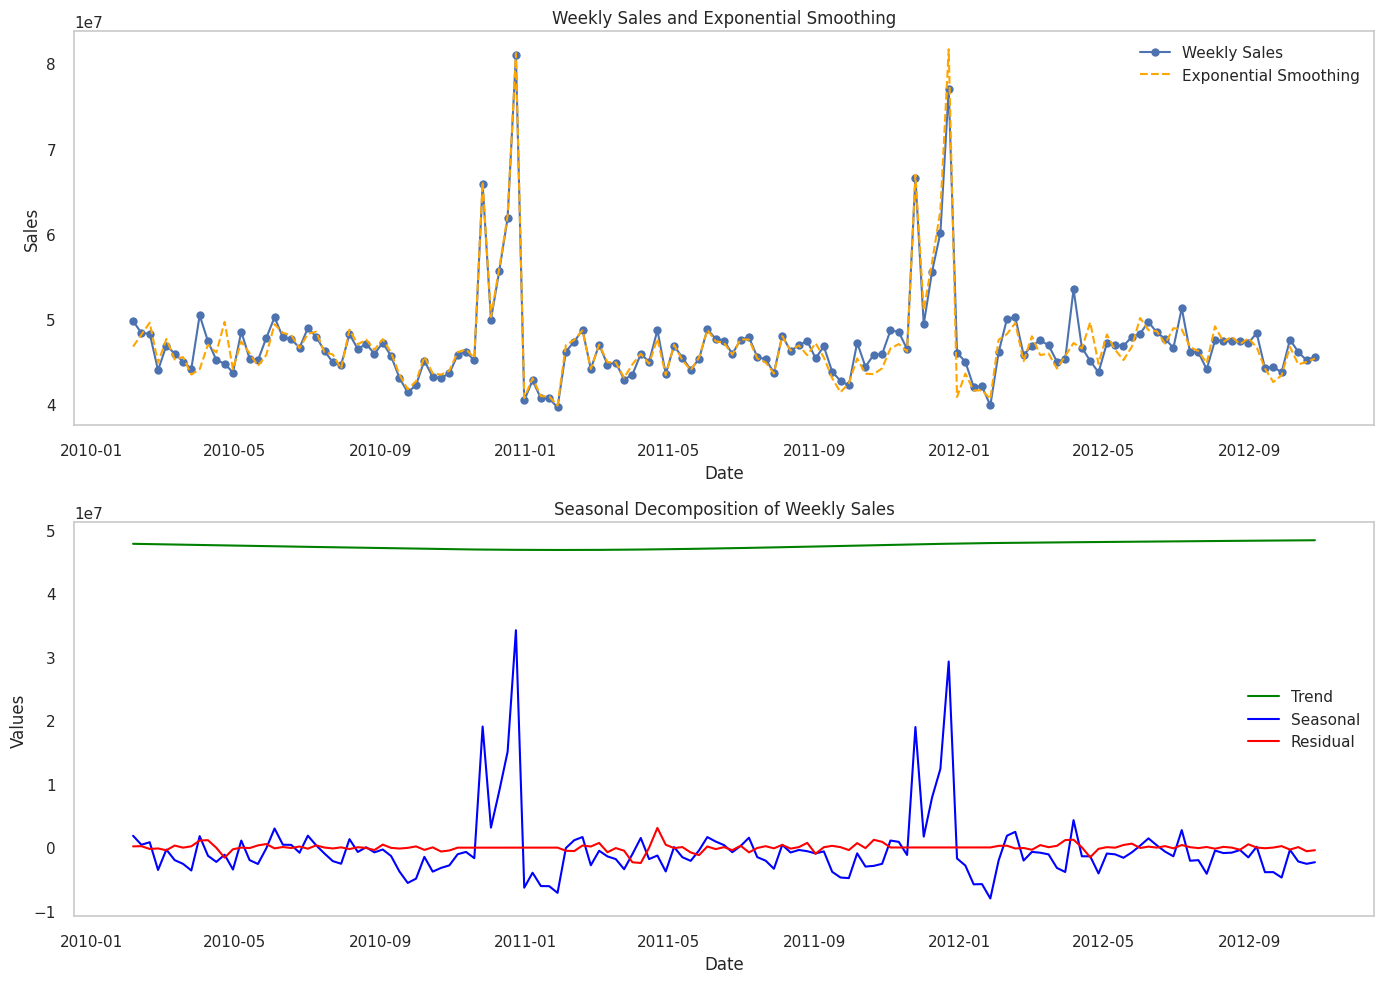

In [ ]:
# Aggregate sales data by date (summing weekly sales)
sales_agg = sales.groupby('Date').agg({'Weekly_Sales': 'sum'}).reset_index()

# Set the 'Date' column as index
sales_agg.set_index('Date', inplace=True)

# Set frequency to weekly on Fridays
sales_agg = sales_agg.asfreq('W-FRI')

# Fill any missing dates with zero sales
sales_agg['Weekly_Sales'] = sales_agg['Weekly_Sales'].fillna(0)

# Exponential Smoothing
model = ExponentialSmoothing(sales_agg['Weekly_Sales'], seasonal='add', seasonal_periods=52)  # Adjusted for yearly seasonality
fit = model.fit()
sales_agg['EWS'] = fit.fittedvalues

# Seasonal Decomposition
stl = STL(sales_agg['Weekly_Sales'], seasonal=51)  # Adjusted for yearly seasonality
result = stl.fit()
sales_agg['Trend'] = result.trend
sales_agg['Seasonal'] = result.seasonal
sales_agg['Residual'] = result.resid

# Plotting results
plt.figure(figsize=(14, 10))

# Weekly Sales and Exponential Smoothing
plt.subplot(2, 1, 1)  # Adjusted subplot layout
plt.plot(sales_agg.index, sales_agg['Weekly_Sales'], label='Weekly Sales', marker='o')
plt.plot(sales_agg.index, sales_agg['EWS'], label='Exponential Smoothing', color='orange', linestyle='--')
plt.title('Weekly Sales and Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()

# Seasonal Decomposition
plt.subplot(2, 1, 2)  # Use the second subplot
plt.plot(sales_agg.index, sales_agg['Trend'], label='Trend', color='green')
plt.plot(sales_agg.index, sales_agg['Seasonal'], label='Seasonal', color='blue')
plt.plot(sales_agg.index, sales_agg['Residual'], label='Residual', color='red')
plt.title('Seasonal Decomposition of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

#### Time-Based Anomaly Detection:

In [ ]:
sales

Store  Dept       Date  Weekly_Sales  IsHoliday
0           1     1 2010-02-05  24924.500000          0
1           1     1 2010-02-12  46039.488281          1
2           1     1 2010-02-19  41595.550781          0
3           1     1 2010-02-26  19403.539062          0
4           1     1 2010-03-05  21827.900391          0
...       ...   ...        ...           ...        ...
421565     45    98 2012-09-28    508.369995          0
421566     45    98 2012-10-05    628.099976          0
421567     45    98 2012-10-12   1061.020020          0
421568     45    98 2012-10-19    760.010010          0
421569     45    98 2012-10-26   1076.800049          0

[421570 rows x 5 columns]

Anomalies detected:
Date
2010-11-28    65821004.0
2010-12-19    61820800.0
2010-12-26    80931416.0
2011-11-27    66593604.0
2011-12-18    60085696.0
2011-12-25    76998240.0
Name: Weekly_Sales, dtype: float32


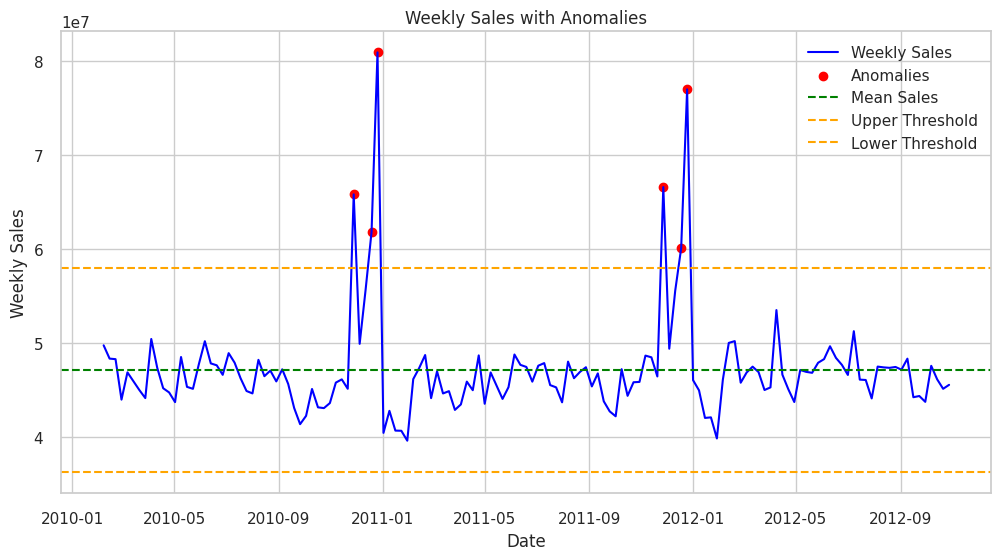

In [ ]:
# Step 2: Group by week (or by day, depending on your needs)
sales.set_index('Date', inplace=True)
weekly_sales = sales.resample('W')['Weekly_Sales'].sum()

# Step 3: Calculate mean and standard deviation
mean_sales = weekly_sales.mean()
std_sales = weekly_sales.std()

# Step 4: Define a Z-score threshold for anomaly detection
z_threshold = 2  # Adjust as needed
anomalies = weekly_sales[(weekly_sales - mean_sales).abs() > z_threshold * std_sales]

# Print anomalies
print("Anomalies detected:")
print(anomalies)

# Optional: Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Weekly Sales', color='blue')
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')
plt.axhline(mean_sales, color='green', linestyle='--', label='Mean Sales')
plt.axhline(mean_sales + z_threshold * std_sales, color='orange', linestyle='--', label='Upper Threshold')
plt.axhline(mean_sales - z_threshold * std_sales, color='orange', linestyle='--', label='Lower Threshold')
plt.title('Weekly Sales with Anomalies')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [ ]:
sales

Store  Dept  Weekly_Sales  IsHoliday
Date                                            
2010-02-05      1     1  24924.500000          0
2010-02-12      1     1  46039.488281          1
2010-02-19      1     1  41595.550781          0
2010-02-26      1     1  19403.539062          0
2010-03-05      1     1  21827.900391          0
...           ...   ...           ...        ...
2012-09-28     45    98    508.369995          0
2012-10-05     45    98    628.099976          0
2012-10-12     45    98   1061.020020          0
2012-10-19     45    98    760.010010          0
2012-10-26     45    98   1076.800049          0

[421570 rows x 4 columns]

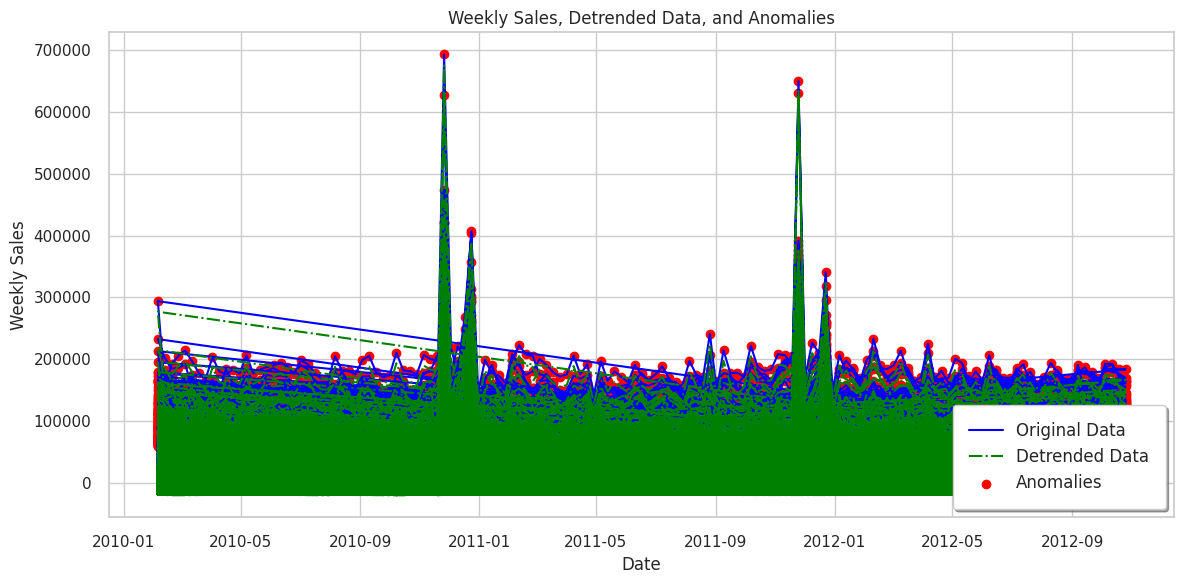

In [ ]:
# Perform linear regression to estimate the trend
from scipy.stats import linregress

# Perform linear regression to estimate the trend
slope, intercept, _, _, _ = linregress(range(len(sales)), sales['Weekly_Sales'])

# Subtract the trend component from the original data to get detrended data
detrended_data = sales['Weekly_Sales'] - (intercept + slope * np.arange(len(sales)))

# Calculate z-scores for the detrended data
z_scores = (detrended_data - detrended_data.mean()) / detrended_data.std()

# Define a threshold for anomaly detection
threshold = 2.0

# Flag data points as anomalies if their z-score exceeds the threshold
anomalies = sales[z_scores.abs() > threshold]

# Plot the original data, detrended data, and flagged anomalies
plt.figure(figsize=(12, 6))

# Original Data
plt.plot(sales.index, sales['Weekly_Sales'], label='Original Data', color='blue')

# Detrended Data
plt.plot(sales.index, detrended_data, label='Detrended Data', linestyle='-.', color='green')

# Mark anomalies as red points
plt.scatter(anomalies.index, anomalies['Weekly_Sales'], c='red', marker='o', label='Anomalies')

# Plot formatting
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales, Detrended Data, and Anomalies')

# Adjust legend position and visibility
plt.legend(loc='lower right', fontsize=12, frameon=True, shadow=True, borderpad=1)

# Show grid and layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

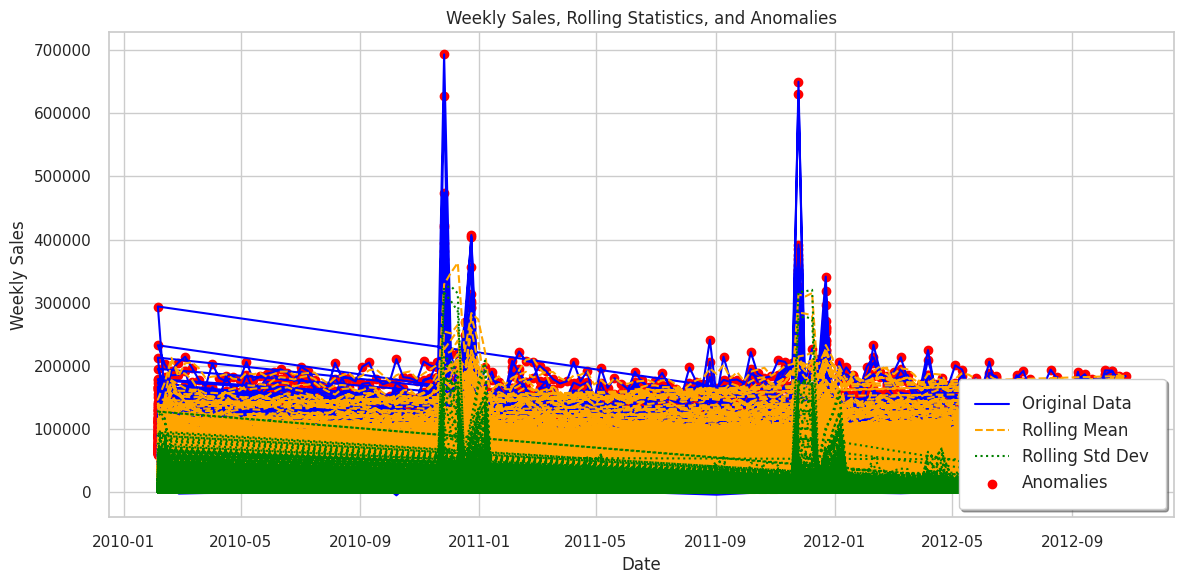

In [ ]:

# Perform linear regression to estimate the trend
slope, intercept, _, _, _ = linregress(range(len(sales)), sales['Weekly_Sales'])

# Subtract the trend component from the original data to get detrended data
detrended_data = sales['Weekly_Sales'] - (intercept + slope * np.arange(len(sales)))

# Calculate rolling statistics
rolling_mean = sales['Weekly_Sales'].rolling(window=3).mean()
rolling_std = sales['Weekly_Sales'].rolling(window=3).std()

# Calculate z-scores for the detrended data
z_scores = (detrended_data - detrended_data.mean()) / detrended_data.std()

# Define a threshold for anomaly detection
threshold = 2.0

# Flag data points as anomalies if their z-score exceeds the threshold
anomalies = sales[z_scores.abs() > threshold]

# Plot the original data, rolling statistics, and flagged anomalies
plt.figure(figsize=(12, 6))

# Original Data
plt.plot(sales.index, sales['Weekly_Sales'], label='Original Data', color='blue')

# Rolling Mean
plt.plot(sales.index, rolling_mean, label='Rolling Mean', linestyle='--', color='orange')

# Rolling Standard Deviation
plt.plot(sales.index, rolling_std, label='Rolling Std Dev', linestyle=':', color='green')

# Mark anomalies as red points
plt.scatter(anomalies.index, anomalies['Weekly_Sales'], c='red', marker='o', label='Anomalies')

# Plot formatting
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales, Rolling Statistics, and Anomalies')

# Adjust legend position and visibility
plt.legend(loc='lower right', fontsize=12, frameon=True, shadow=True, borderpad=1)

# Show grid and layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

Handling anomlay using Winsorization

In [ ]:
 # Calculate the 5th and 95th percentiles
lower_bound = sales['Weekly_Sales'].quantile(0.05)
upper_bound = sales['Weekly_Sales'].quantile(0.95)
# Winsorization
sales['Weekly_Sales'] = np.where(sales['Weekly_Sales'] < lower_bound, lower_bound,
                                 np.where(sales['Weekly_Sales'] > upper_bound, upper_bound, sales['Weekly_Sales']))

### Analyze sales trends over time.


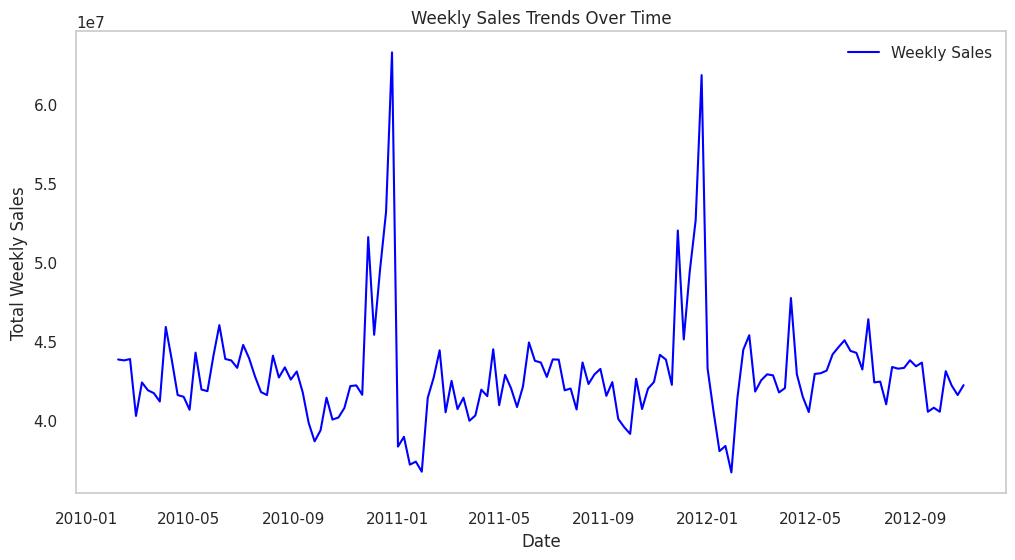

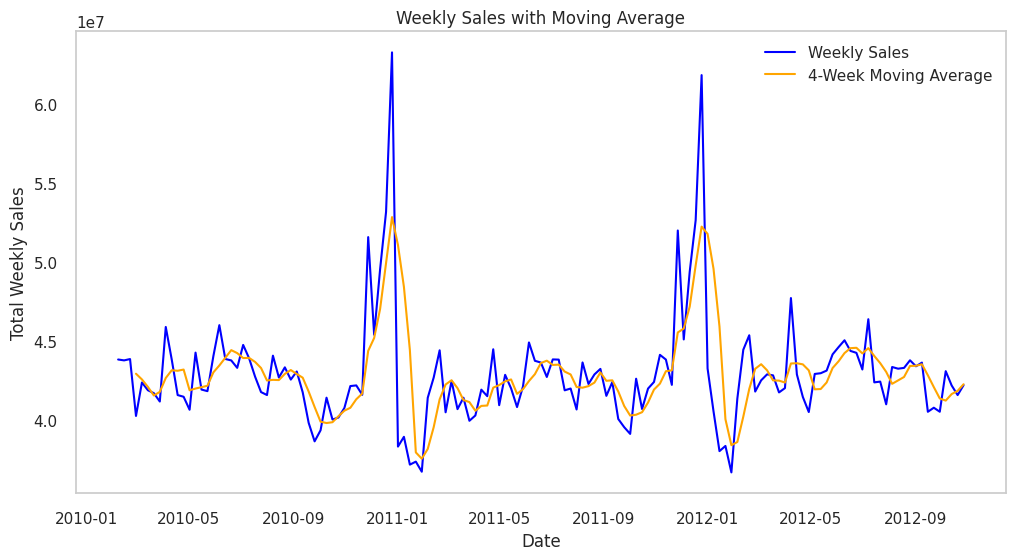

In [ ]:

# Step 3: Aggregate sales data (e.g., by week)
weekly_sales = sales.resample('W')['Weekly_Sales'].sum()

# Step 4: Visualize the trends
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Weekly Sales', color='blue')
plt.title('Weekly Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.grid()
plt.show()

# Step 5: Calculate and visualize moving averages
moving_average = weekly_sales.rolling(window=4).mean()  # 4-week moving average

plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Weekly Sales', color='blue')
plt.plot(moving_average, label='4-Week Moving Average', color='orange')
plt.title('Weekly Sales with Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.grid()
plt.show()

In [ ]:
summary_stats = sales['Weekly_Sales'].describe()
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
count    421570.000000
mean      14558.648438
std       17146.158203
min          59.974499
25%        2079.649902
50%        7612.029785
75%       20205.852051
max       61201.949219
Name: Weekly_Sales, dtype: float64


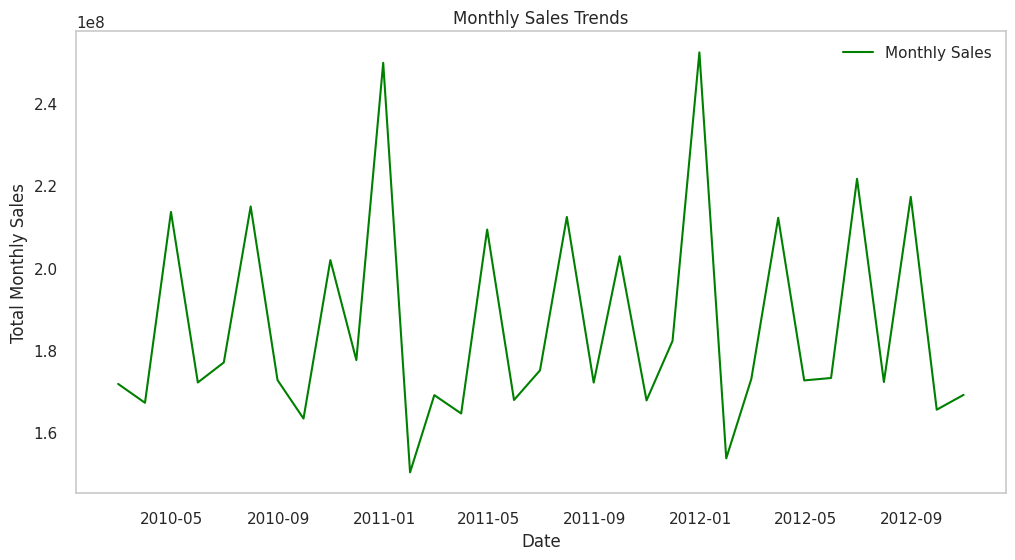

In [ ]:
# Monthly sales aggregation
monthly_sales = sales.resample('M')['Weekly_Sales'].sum()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales', color='green')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Monthly Sales')
plt.legend()
plt.grid()
plt.show()

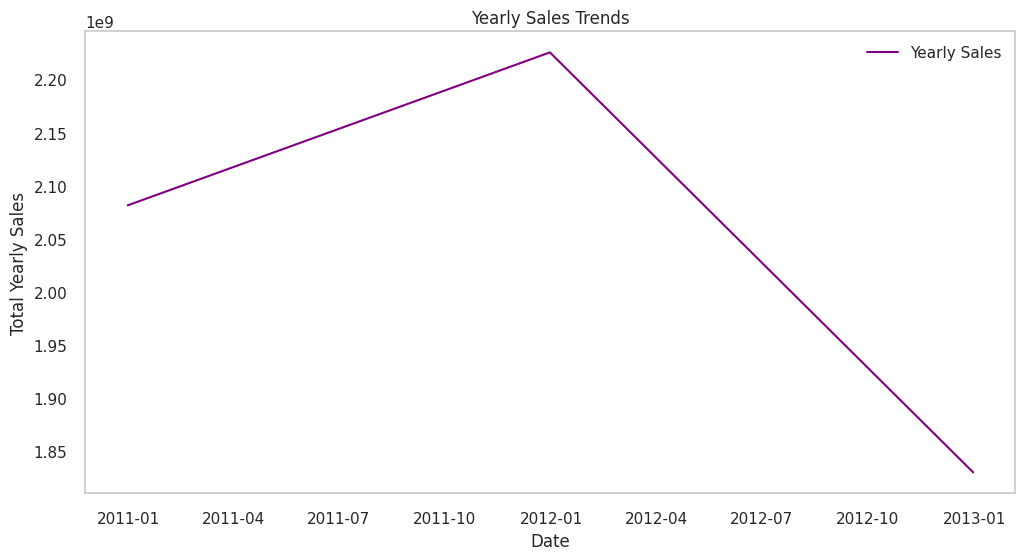

In [ ]:
# Yearly sales aggregation
yearly_sales = sales.resample('Y')['Weekly_Sales'].sum()

# Plot yearly sales trends
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales, label='Yearly Sales', color='purple')
plt.title('Yearly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Yearly Sales')
plt.legend()
plt.grid()
plt.show()

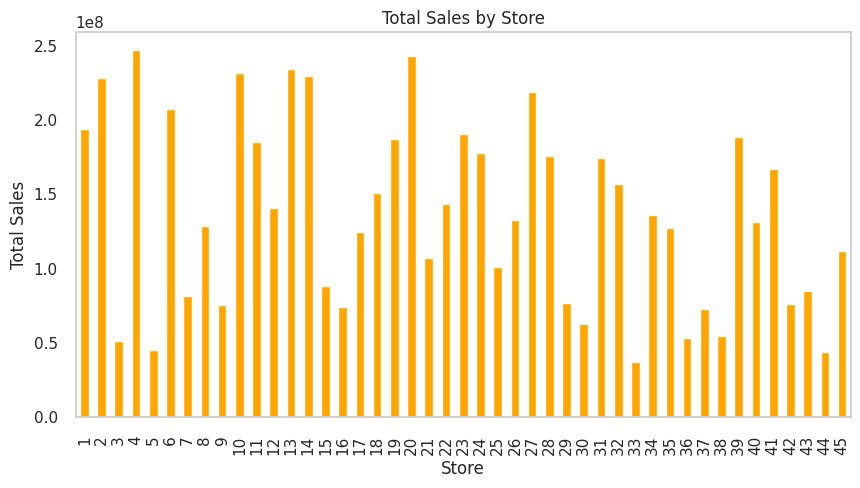

In [ ]:
# Group sales by store
store_sales = sales.groupby('Store')['Weekly_Sales'].sum()

# Plot sales by store
store_sales.plot(kind='bar', figsize=(10, 5), color='orange')
plt.title('Total Sales by Store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

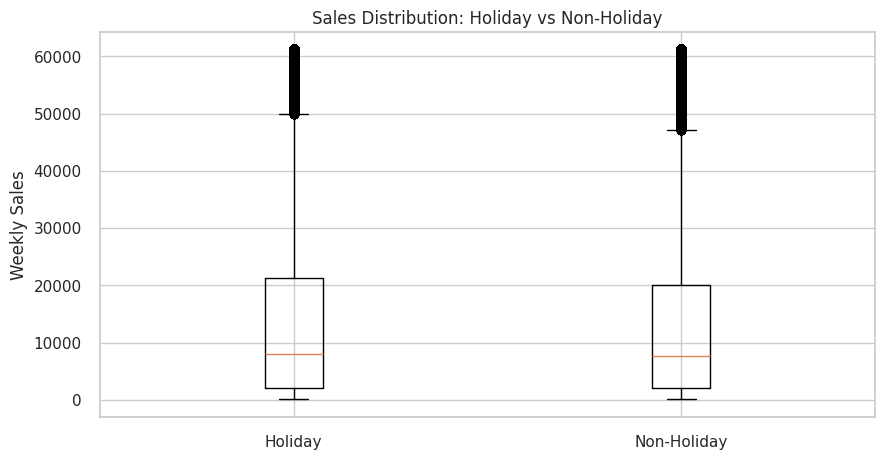

In [ ]:
# Comparing holiday vs non-holiday sales
holiday_sales = sales[sales['IsHoliday'] == 1]['Weekly_Sales']
non_holiday_sales = sales[sales['IsHoliday'] == 0]['Weekly_Sales']

plt.figure(figsize=(10, 5))
plt.boxplot([holiday_sales, non_holiday_sales], labels=['Holiday', 'Non-Holiday'])
plt.title('Sales Distribution: Holiday vs Non-Holiday')
plt.ylabel('Weekly Sales')
plt.show()

Correlation Matrix:
                 Store      Dept  Weekly_Sales  IsHoliday
Store         1.000000  0.024004     -0.079015  -0.000548
Dept          0.024004  1.000000      0.119118   0.000916
Weekly_Sales -0.079015  0.119118      1.000000   0.006571
IsHoliday    -0.000548  0.000916      0.006571   1.000000


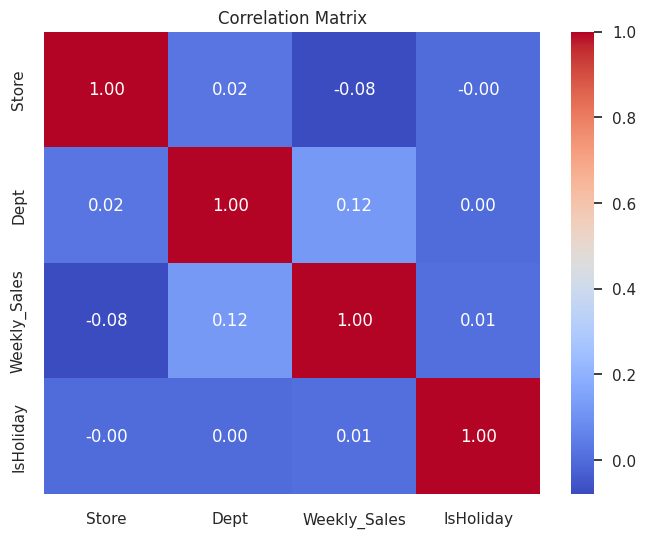

In [ ]:
# Correlation matrix
correlation_matrix = sales.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

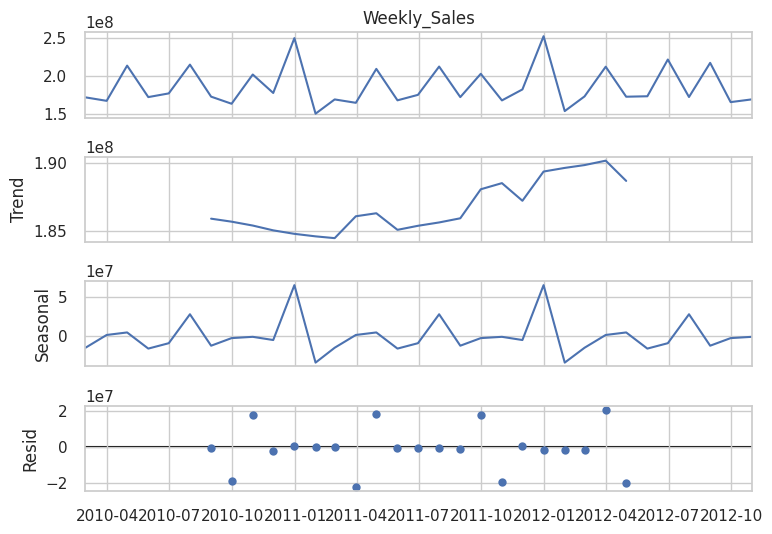

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(monthly_sales, model='additive')
decomposition.plot()
plt.show()

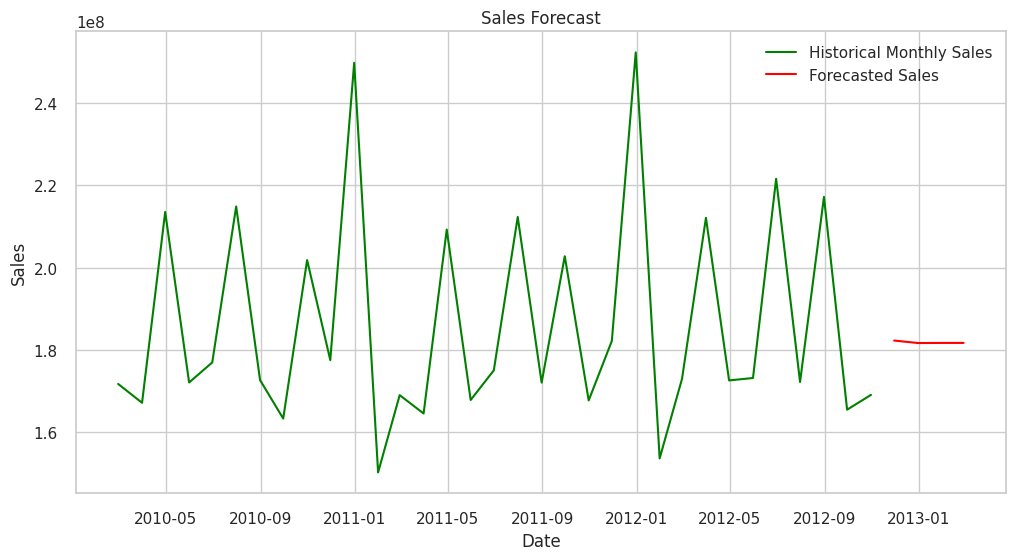

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(monthly_sales, order=(1, 1, 1))  # Order can be adjusted
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=4)  # Forecast next 4 months

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Historical Monthly Sales', color='green')
plt.plot(forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

ADF Statistic: -6.5801798972579215
p-value: 7.54862036203599e-09


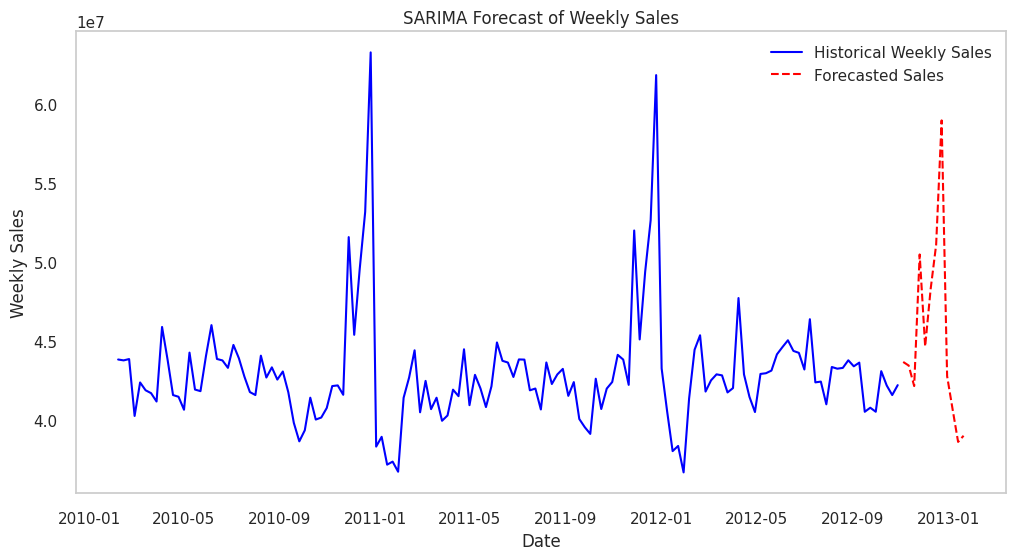

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
# Step 3: Aggregate sales data (e.g., by week)

weekly_sales = sales.resample('W')['Weekly_Sales'].sum()

# Step 4: Check stationarity (Dickey-Fuller test)
result = adfuller(weekly_sales)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

model = SARIMAX(weekly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
model_fit = model.fit()

# Step 6: Make predictions
forecast = model_fit.forecast(steps=12)  # Forecasting the next 12 weeks

# Step 7: Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Historical Weekly Sales', color='blue')
plt.plot(forecast, label='Forecasted Sales', color='red', linestyle='--')
plt.title('SARIMA Forecast of Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()

Interpretation:
ADF Statistic: A more negative value suggests that the null hypothesis (the presence of a unit root, indicating non-stationarity) can be rejected.
p-value: Since the p-value is much lower than the common significance level (0.05), you can reject the null hypothesis.

 time series data (weekly sales) is stationary, which means you can proceed with the SARIMA model fitting as planned without needing to difference the data.

    ///

------------------------------understanding store and department performance over time.

In [ ]:
# Aggregate weekly sales by store and department
weekly_sales = sales.groupby(['Store', 'Dept']).resample('W')['Weekly_Sales'].sum().reset_index()

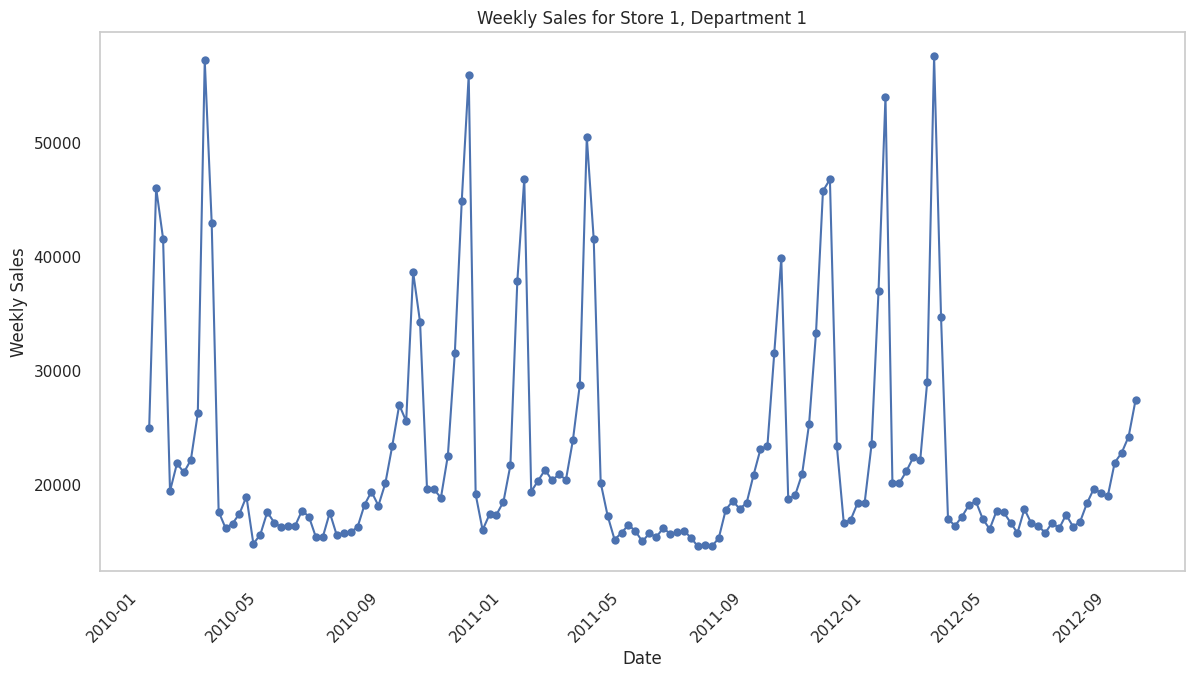

In [ ]:
store_dept_sales = weekly_sales[(weekly_sales['Store'] == 1) & (weekly_sales['Dept'] == 1)]

plt.figure(figsize=(14, 7))
plt.plot(store_dept_sales['Date'], store_dept_sales['Weekly_Sales'], marker='o')
plt.title('Weekly Sales for Store 1, Department 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

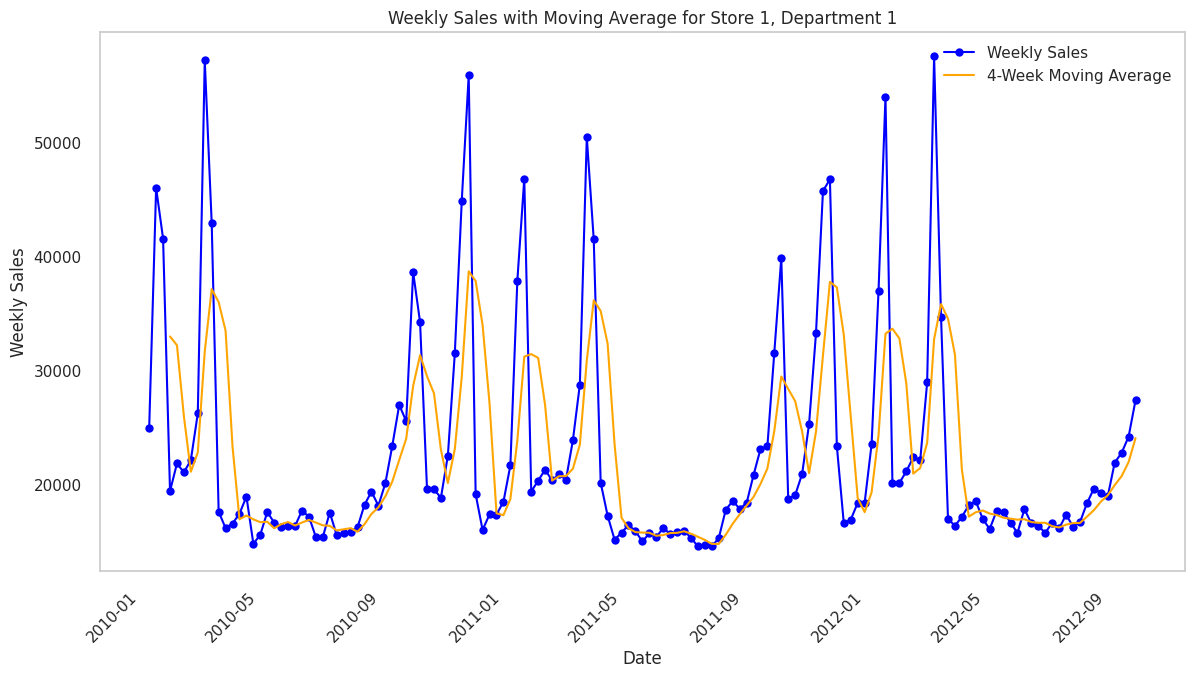

In [ ]:
store_dept_sales['Moving_Avg'] = store_dept_sales['Weekly_Sales'].rolling(window=4).mean()

plt.figure(figsize=(14, 7))
plt.plot(store_dept_sales['Date'], store_dept_sales['Weekly_Sales'], label='Weekly Sales', marker='o', color='blue')
plt.plot(store_dept_sales['Date'], store_dept_sales['Moving_Avg'], label='4-Week Moving Average', color='orange')
plt.title('Weekly Sales with Moving Average for Store 1, Department 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

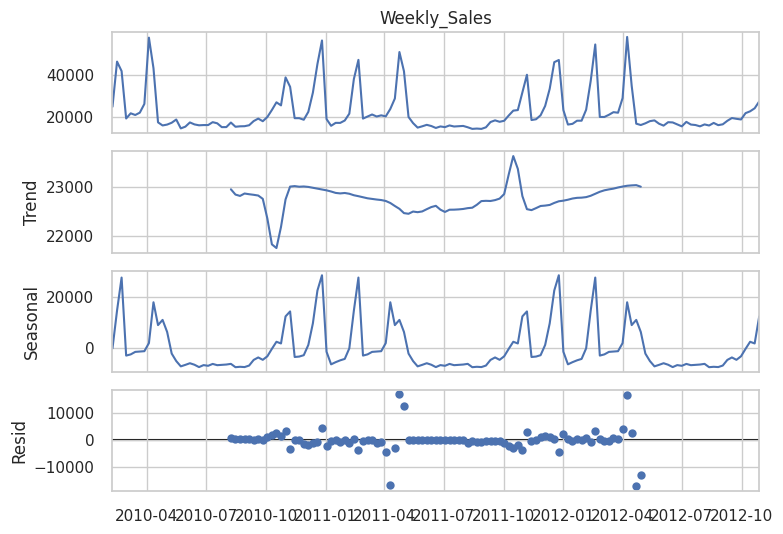

In [ ]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(store_dept_sales.set_index('Date')['Weekly_Sales'], model='additive')
fig = decomposition.plot()
plt.show()

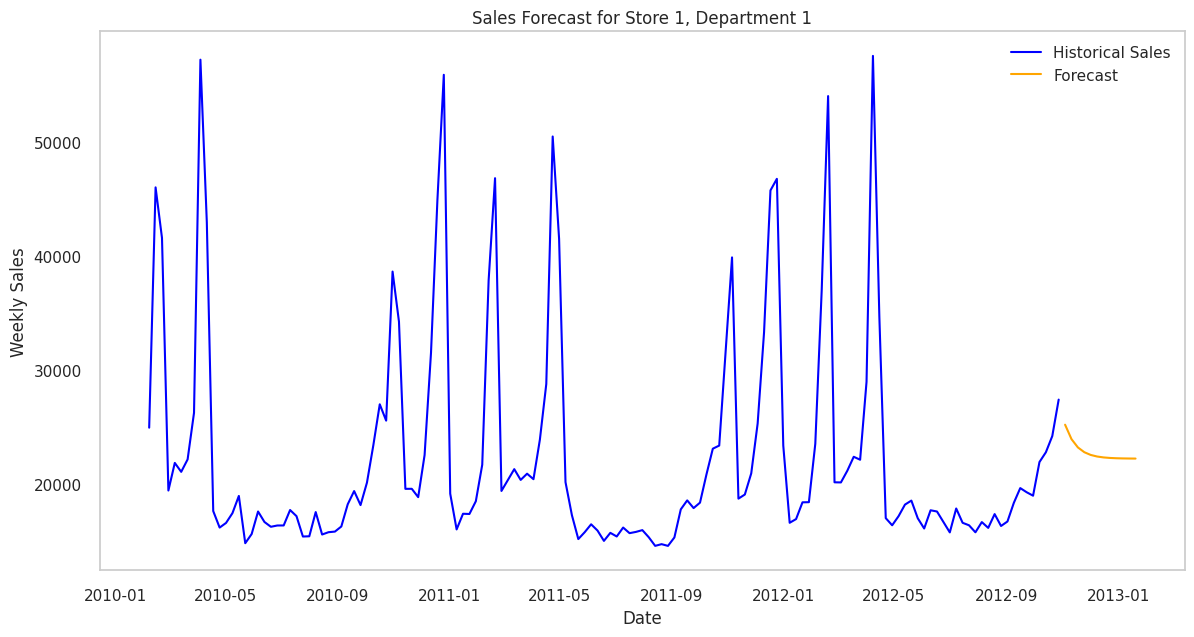

In [ ]:
model = ARIMA(store_dept_sales['Weekly_Sales'], order=(1, 1, 1))  # Adjust parameters as needed
model_fit = model.fit()

# Forecasting future sales
forecast = model_fit.forecast(steps=12)  # Forecast for the next 12 weeks

# Plotting the forecast
plt.figure(figsize=(14, 7))
plt.plot(store_dept_sales['Date'], store_dept_sales['Weekly_Sales'], label='Historical Sales', color='blue')
plt.plot(pd.date_range(start=store_dept_sales['Date'].iloc[-1], periods=13, freq='W')[1:], forecast, label='Forecast', color='orange')
plt.title('Sales Forecast for Store 1, Department 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#  Visualize sales trends for all stores
random_stores = np.random.choice(weekly_sales['Store'].unique(), size=5, replace=False)

# Define a list of colors
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create a Plotly figure
fig = go.Figure()

for store in random_stores:
    # Filter data for the current store
    store_sales = weekly_sales[weekly_sales['Store'] == store]

    # Get unique departments for the current store
    store_depts = store_sales['Dept'].unique()

    for dept in store_depts:
        dept_sales = store_sales[store_sales['Dept'] == dept]

        # Add a trace for each department
        fig.add_trace(go.Scatter(
            x=dept_sales['Date'],
            y=dept_sales['Weekly_Sales'],
            mode='lines+markers',
            name=f'Store {store}, Dept {dept}',
            hovertemplate='<b>Date:</b> %{x}<br><b>Weekly Sales:</b> %{y}<extra></extra>',
            line=dict(color=color_list[dept % len(color_list)]),  # Use color list
            marker=dict(size=6)
        ))

# Update layout
fig.update_layout(
    title='Weekly Sales for Selected Stores and Departments',
    xaxis_title='Date',
    yaxis_title='Weekly Sales',
    hovermode='closest'
)

# Show the figure
fig.show()

In [ ]:
alpha = 0.2  # example value for smoothing factor
sales['EWMA'] = sales['Weekly_Sales'].ewm(alpha=alpha, adjust=False).mean()

# Display the DataFrame with EWMA
print(sales)


            Store  Dept  Weekly_Sales  IsHoliday          EWMA
Date                                                          
2010-02-05      1     1  24924.500000          0  24924.500000
2010-02-12      1     1  46039.488281          1  29147.497656
2010-02-19      1     1  41595.550781          0  31637.108281
2010-02-26      1     1  19403.539062          0  29190.394438
2010-03-05      1     1  21827.900391          0  27717.895628
...           ...   ...           ...        ...           ...
2012-09-28     45    98    508.369995          0    516.875084
2012-10-05     45    98    628.099976          0    539.120063
2012-10-12     45    98   1061.020020          0    643.500054
2012-10-19     45    98    760.010010          0    666.802045
2012-10-26     45    98   1076.800049          0    748.801646

[421570 rows x 5 columns]


#Customer Segmentation Analysis:

In [ ]:
sales

Store  Dept  Weekly_Sales  IsHoliday          EWMA
Date                                                          
2010-02-05      1     1  24924.500000          0  24924.500000
2010-02-12      1     1  46039.488281          1  29147.497656
2010-02-19      1     1  41595.550781          0  31637.108281
2010-02-26      1     1  19403.539062          0  29190.394438
2010-03-05      1     1  21827.900391          0  27717.895628
...           ...   ...           ...        ...           ...
2012-09-28     45    98    508.369995          0    516.875084
2012-10-05     45    98    628.099976          0    539.120063
2012-10-12     45    98   1061.020020          0    643.500054
2012-10-19     45    98    760.010010          0    666.802045
2012-10-26     45    98   1076.800049          0    748.801646

[421570 rows x 5 columns]

In [ ]:
features

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05/02/2010        42.31       2.572        NaN        NaN   
1         1  12/02/2010        38.51       2.548        NaN        NaN   
2         1  19/02/2010        39.93       2.514        NaN        NaN   
3         1  26/02/2010        46.63       2.561        NaN        NaN   
4         1  05/03/2010        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  28/06/2013        76.05       3.639    4842.29     975.03   
8186     45  05/07/2013        77.50       3.614    9090.48    2268.58   
8187     45  12/07/2013        79.37       3.614    3789.94    1827.31   
8188     45  19/07/2013        82.84       3.737    2961.49    1047.07   
8189     45  26/07/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

In [ ]:
stores

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [ ]:
stores['Store'] = stores['Store'].astype('int32')
stores['Size'] = stores['Size'].astype('float32')

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
features['MarkDown1'].fillna(features['MarkDown1'].mean(), inplace=True)
features['MarkDown2'].fillna(features['MarkDown2'].mean(), inplace=True)
features['MarkDown3'].fillna(features['MarkDown3'].mean(), inplace=True)
features['MarkDown4'].fillna(features['MarkDown4'].mean(), inplace=True)
features['MarkDown5'].fillna(features['MarkDown5'].mean(), inplace=True)
features['CPI'].fillna(features['CPI'].mean(), inplace=True)
features['Unemployment'].fillna(features['Unemployment'].mean(), inplace=True)

In [ ]:
features

Store        Date  Temperature  Fuel_Price    MarkDown1    MarkDown2  \
0         1  05/02/2010        42.31       2.572  7032.371786  3384.176594   
1         1  12/02/2010        38.51       2.548  7032.371786  3384.176594   
2         1  19/02/2010        39.93       2.514  7032.371786  3384.176594   
3         1  26/02/2010        46.63       2.561  7032.371786  3384.176594   
4         1  05/03/2010        46.50       2.625  7032.371786  3384.176594   
...     ...         ...          ...         ...          ...          ...   
8185     45  28/06/2013        76.05       3.639  4842.290000   975.030000   
8186     45  05/07/2013        77.50       3.614  9090.480000  2268.580000   
8187     45  12/07/2013        79.37       3.614  3789.940000  1827.310000   
8188     45  19/07/2013        82.84       3.737  2961.490000  1047.070000   
8189     45  26/07/2013        76.06       3.804   212.020000   851.730000   

       MarkDown3    MarkDown4    MarkDown5         CPI  Unemployment  \
0     1760.10018  3292.935886  4132.216422  211.096358      8.106000   
1     1760.10018  3292.935886  4132.216422  211.242170      8.106000   
2     1760.10018  3292.935886  4132.216422  211.289143      8.106000   
3     1760.10018  3292.935886  4132.216422  211.319643      8.106000   
4     1760.10018  3292.935886  4132.216422  211.350143      8.106000   
...          ...          ...          ...         ...           ...   
8185     3.00000  2449.970000  3169.690000  172.460809      7.826821   
8186   582.74000  5797.470000  1514.930000  172.460809      7.826821   
8187    85.72000   744.840000  2150.360000  172.460809      7.826821   
8188   204.19000   363.000000  1059.460000  172.460809      7.826821   
8189     2.06000    10.880000  1864.570000  172.460809      7.826821   

      IsHoliday  
0         False  
1          True  
2         False  
3         False  
4         False  
...         ...  
8185      False  
8186      False  
8187      False  
8188      False  
8189      False  

[8190 rows x 12 columns]

In [ ]:
# Optimize dtypes
features['Store'] = features['Store'].astype('int32')
features['Date'] = pd.to_datetime(features['Date'],dayfirst=True)  # Convert to datetime
features['Temperature'] = features['Temperature'].astype('float32')
features['Fuel_Price'] = features['Fuel_Price'].astype('float32')

# Convert MarkDown columns and others to float32
for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']:
    features[col] = features[col].astype('float32')

# IsHoliday remains as bool
features['IsHoliday'] = features['IsHoliday'].astype('int32')

# Display optimized DataFrame info
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int32         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float32       
 3   Fuel_Price    8190 non-null   float32       
 4   MarkDown1     8190 non-null   float32       
 5   MarkDown2     8190 non-null   float32       
 6   MarkDown3     8190 non-null   float32       
 7   MarkDown4     8190 non-null   float32       
 8   MarkDown5     8190 non-null   float32       
 9   CPI           8190 non-null   float32       
 10  Unemployment  8190 non-null   float32       
 11  IsHoliday     8190 non-null   int32         
dtypes: datetime64[ns](1), float32(9), int32(2)
memory usage: 416.0 KB
None


In [ ]:

features_store_merged_df = pd.merge(features, stores, on='Store', how='inner')

In [ ]:
features_store_merged_df

Store       Date  Temperature  Fuel_Price    MarkDown1    MarkDown2  \
0         1 2010-02-05    42.310001       2.572  7032.371582  3384.176514   
1         1 2010-02-12    38.509998       2.548  7032.371582  3384.176514   
2         1 2010-02-19    39.930000       2.514  7032.371582  3384.176514   
3         1 2010-02-26    46.630001       2.561  7032.371582  3384.176514   
4         1 2010-03-05    46.500000       2.625  7032.371582  3384.176514   
...     ...        ...          ...         ...          ...          ...   
8185     45 2013-06-28    76.050003       3.639  4842.290039   975.030029   
8186     45 2013-07-05    77.500000       3.614  9090.480469  2268.580078   
8187     45 2013-07-12    79.370003       3.614  3789.939941  1827.310059   
8188     45 2013-07-19    82.839996       3.737  2961.489990  1047.069946   
8189     45 2013-07-26    76.059998       3.804   212.020004   851.729980   

        MarkDown3    MarkDown4    MarkDown5         CPI  Unemployment  \
0     1760.100220  3292.935791  4132.216309  211.096359      8.106000   
1     1760.100220  3292.935791  4132.216309  211.242172      8.106000   
2     1760.100220  3292.935791  4132.216309  211.289139      8.106000   
3     1760.100220  3292.935791  4132.216309  211.319641      8.106000   
4     1760.100220  3292.935791  4132.216309  211.350143      8.106000   
...           ...          ...          ...         ...           ...   
8185     3.000000  2449.969971  3169.689941  172.460815      7.826821   
8186   582.739990  5797.470215  1514.930054  172.460815      7.826821   
8187    85.720001   744.840027  2150.360107  172.460815      7.826821   
8188   204.190002   363.000000  1059.459961  172.460815      7.826821   
8189     2.060000    10.880000  1864.569946  172.460815      7.826821   

      IsHoliday Type      Size  
0             0    A  151315.0  
1             1    A  151315.0  
2             0    A  151315.0  
3             0    A  151315.0  
4             0    A  151315.0  
...         ...  ...       ...  
8185          0    B  118221.0  
8186          0    B  118221.0  
8187          0    B  118221.0  
8188          0    B  118221.0  
8189          0    B  118221.0  

[8190 rows x 14 columns]

In [ ]:
# creting some features:

In [ ]:
# Price per size
features_store_merged_df['Price_Per_Size'] = features_store_merged_df['Fuel_Price'] / features_store_merged_df['Size']

# Average Markdown
features_store_merged_df['Avg_Markdown'] = (features_store_merged_df['MarkDown1'] + features_store_merged_df['MarkDown2'] +
                              features_store_merged_df['MarkDown3'] + features_store_merged_df['MarkDown4'] +
                              features_store_merged_df['MarkDown5']) / 5

# Seasonal Indicator
features_store_merged_df['Month'] = pd.to_datetime(features_store_merged_df['Date']).dt.month
features_store_merged_df['Season'] = pd.cut(features_store_merged_df['Month'], bins=[0, 2, 5, 8, 11, 12],
                               labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'], include_lowest=True,ordered=False)


In [ ]:
features_store_merged_df

Store       Date  Temperature  Fuel_Price    MarkDown1    MarkDown2  \
0         1 2010-02-05    42.310001       2.572  7032.371582  3384.176514   
1         1 2010-02-12    38.509998       2.548  7032.371582  3384.176514   
2         1 2010-02-19    39.930000       2.514  7032.371582  3384.176514   
3         1 2010-02-26    46.630001       2.561  7032.371582  3384.176514   
4         1 2010-03-05    46.500000       2.625  7032.371582  3384.176514   
...     ...        ...          ...         ...          ...          ...   
8185     45 2013-06-28    76.050003       3.639  4842.290039   975.030029   
8186     45 2013-07-05    77.500000       3.614  9090.480469  2268.580078   
8187     45 2013-07-12    79.370003       3.614  3789.939941  1827.310059   
8188     45 2013-07-19    82.839996       3.737  2961.489990  1047.069946   
8189     45 2013-07-26    76.059998       3.804   212.020004   851.729980   

        MarkDown3    MarkDown4    MarkDown5         CPI  Unemployment  \
0     1760.100220  3292.935791  4132.216309  211.096359      8.106000   
1     1760.100220  3292.935791  4132.216309  211.242172      8.106000   
2     1760.100220  3292.935791  4132.216309  211.289139      8.106000   
3     1760.100220  3292.935791  4132.216309  211.319641      8.106000   
4     1760.100220  3292.935791  4132.216309  211.350143      8.106000   
...           ...          ...          ...         ...           ...   
8185     3.000000  2449.969971  3169.689941  172.460815      7.826821   
8186   582.739990  5797.470215  1514.930054  172.460815      7.826821   
8187    85.720001   744.840027  2150.360107  172.460815      7.826821   
8188   204.190002   363.000000  1059.459961  172.460815      7.826821   
8189     2.060000    10.880000  1864.569946  172.460815      7.826821   

      IsHoliday Type      Size  Price_Per_Size  Avg_Markdown  Month  Season  
0             0    A  151315.0        0.000017   3920.360107      2  Winter  
1             1    A  151315.0        0.000017   3920.360107      2  Winter  
2             0    A  151315.0        0.000017   3920.360107      2  Winter  
3             0    A  151315.0        0.000017   3920.360107      2  Winter  
4             0    A  151315.0        0.000017   3920.360107      3  Spring  
...         ...  ...       ...             ...           ...    ...     ...  
8185          0    B  118221.0        0.000031   2287.996094      6  Summer  
8186          0    B  118221.0        0.000031   3850.840332      7  Summer  
8187          0    B  118221.0        0.000031   1719.634033      7  Summer  
8188          0    B  118221.0        0.000032   1127.041992      7  Summer  
8189          0    B  118221.0        0.000032    588.252014      7  Summer  

[8190 rows x 18 columns]

In [ ]:
features_store_merged_df['Temp_Category'] = pd.cut(features_store_merged_df['Temperature'], bins=[0, 50, 70, 100],
                                     labels=['Low', 'Medium', 'High'])

In [ ]:
features_store_merged_df

Store       Date  Temperature  Fuel_Price    MarkDown1    MarkDown2  \
0         1 2010-02-05    42.310001       2.572  7032.371582  3384.176514   
1         1 2010-02-12    38.509998       2.548  7032.371582  3384.176514   
2         1 2010-02-19    39.930000       2.514  7032.371582  3384.176514   
3         1 2010-02-26    46.630001       2.561  7032.371582  3384.176514   
4         1 2010-03-05    46.500000       2.625  7032.371582  3384.176514   
...     ...        ...          ...         ...          ...          ...   
8185     45 2013-06-28    76.050003       3.639  4842.290039   975.030029   
8186     45 2013-07-05    77.500000       3.614  9090.480469  2268.580078   
8187     45 2013-07-12    79.370003       3.614  3789.939941  1827.310059   
8188     45 2013-07-19    82.839996       3.737  2961.489990  1047.069946   
8189     45 2013-07-26    76.059998       3.804   212.020004   851.729980   

        MarkDown3    MarkDown4    MarkDown5         CPI  Unemployment  \
0     1760.100220  3292.935791  4132.216309  211.096359      8.106000   
1     1760.100220  3292.935791  4132.216309  211.242172      8.106000   
2     1760.100220  3292.935791  4132.216309  211.289139      8.106000   
3     1760.100220  3292.935791  4132.216309  211.319641      8.106000   
4     1760.100220  3292.935791  4132.216309  211.350143      8.106000   
...           ...          ...          ...         ...           ...   
8185     3.000000  2449.969971  3169.689941  172.460815      7.826821   
8186   582.739990  5797.470215  1514.930054  172.460815      7.826821   
8187    85.720001   744.840027  2150.360107  172.460815      7.826821   
8188   204.190002   363.000000  1059.459961  172.460815      7.826821   
8189     2.060000    10.880000  1864.569946  172.460815      7.826821   

      IsHoliday Type      Size  Price_Per_Size  Avg_Markdown  Month  Season  \
0             0    A  151315.0        0.000017   3920.360107      2  Winter   
1             1    A  151315.0        0.000017   3920.360107      2  Winter   
2             0    A  151315.0        0.000017   3920.360107      2  Winter   
3             0    A  151315.0        0.000017   3920.360107      2  Winter   
4             0    A  151315.0        0.000017   3920.360107      3  Spring   
...         ...  ...       ...             ...           ...    ...     ...   
8185          0    B  118221.0        0.000031   2287.996094      6  Summer   
8186          0    B  118221.0        0.000031   3850.840332      7  Summer   
8187          0    B  118221.0        0.000031   1719.634033      7  Summer   
8188          0    B  118221.0        0.000032   1127.041992      7  Summer   
8189          0    B  118221.0        0.000032    588.252014      7  Summer   

     Temp_Category  
0              Low  
1              Low  
2              Low  
3              Low  
4              Low  
...            ...  
8185          High  
8186          High  
8187          High  
8188          High  
8189          High  

[8190 rows x 19 columns]

In [ ]:
duplicate_count = features_store_merged_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
sales_stores_merged_df = pd.merge(sales, stores, on='Store', how='inner')

In [ ]:
# Sales Change
sales_stores_merged_df['Sales_Change'] = sales_stores_merged_df['Weekly_Sales'].diff()

# Average Sales Per Store Size
sales_stores_merged_df['Sales_Per_Size'] = sales_stores_merged_df['Weekly_Sales'] / sales_stores_merged_df['Size']

# Moving Average Sales
sales_stores_merged_df['4_Week_MA_Sales'] = sales_stores_merged_df['Weekly_Sales'].rolling(window=4).mean()

# Sales Ratio
department_avg_sales = sales_stores_merged_df.groupby('Dept')['Weekly_Sales'].transform('mean')
sales_stores_merged_df['Sales_Ratio'] = sales_stores_merged_df['Weekly_Sales'] / department_avg_sales

# Sales Category
sales_stores_merged_df['Sales_Category'] = pd.cut(
    sales_stores_merged_df['Weekly_Sales'], bins=[0, 1000, 10000, 50000, float('inf')],
    labels=['Low', 'Medium', 'High', 'Very High']
)

In [ ]:
sales_stores_merged_df

Store  Dept  Weekly_Sales  IsHoliday          EWMA Type      Size  \
0           1     1  24924.500000          0  24924.500000    A  151315.0   
1           1     1  46039.488281          1  29147.497656    A  151315.0   
2           1     1  41595.550781          0  31637.108281    A  151315.0   
3           1     1  19403.539062          0  29190.394438    A  151315.0   
4           1     1  21827.900391          0  27717.895628    A  151315.0   
...       ...   ...           ...        ...           ...  ...       ...   
421565     45    98    508.369995          0    516.875084    B  118221.0   
421566     45    98    628.099976          0    539.120063    B  118221.0   
421567     45    98   1061.020020          0    643.500054    B  118221.0   
421568     45    98    760.010010          0    666.802045    B  118221.0   
421569     45    98   1076.800049          0    748.801646    B  118221.0   

        Sales_Change  Sales_Per_Size  4_Week_MA_Sales  Sales_Ratio  \
0                NaN        0.164719              NaN     1.334082   
1       21114.988281        0.304263              NaN     2.464261   
2       -4443.937500        0.274894              NaN     2.226399   
3      -22192.011719        0.128233     32990.769531     1.038573   
4        2424.361328        0.144255     32216.619629     1.168337   
...              ...             ...              ...          ...   
421565     41.070007        0.004300       483.517502     0.074445   
421566    119.729980        0.005313       552.432495     0.091978   
421567    432.920044        0.008975       666.197495     0.155374   
421568   -301.010010        0.006429       739.375000     0.111295   
421569    316.790039        0.009108       881.482513     0.157685   

       Sales_Category  
0                High  
1                High  
2                High  
3                High  
4                High  
...               ...  
421565            Low  
421566            Low  
421567         Medium  
421568            Low  
421569         Medium  

[421570 rows x 12 columns]

In [ ]:
duplicate_count = sales_stores_merged_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 1488
